# PART A

## A1

First, we begin by importing the necessary libriries. We use **numpy** for numeric operations and **matplotlib** for plots.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

$D1$ stores the training samples for class $\omega_1$ (no stress), while $D2$ is the training set for class $\omega_2$ (stress).

In [2]:
D1 = np.array([ 2.8, -0.4, -0.8,  2.3, -0.3, 3.6, 4.1])
D2 = np.array([-4.5, -3.4, -3.1, -3.0, -2.3])

We declare the PDF for $x$ given $\theta$ like so: 
$$  
p(x \mid \theta) = \frac{\pi}{1 + (x - \theta)^2} 
$$
(This is the **Cauchy distribution**)

In [3]:
def pdf(x, theta):
    return 1 / (np.pi*(1 + (x-theta)**2))

This function computes log-likelihood of $\theta$, given a dataset $D$ and a parameter :
$$
\log L(\theta \mid D) = \sum_{x \in D} \log p(x \mid \theta)
$$


In [4]:
def log_likelihood(D, theta):
    return np.sum(np.log(pdf(D, theta)))

### Maximizing Log-Likelihood

To determine the value of $\theta$ that maximizes the likelihood, $L(\theta \mid D)$, we focus on the log-likelihood function instead of the regular likelihood function. This is because the logarithm is a monotonically increasing function, meaning the maximum value remains at the same point, and working with logarithms simplifies the computation by converting products into sums.

#### Gradient Approach

In principle, the gradient of log-likelihood could be used to find its maximum. However, the gradient of this function does not have a closed-form expression, making it computationally challenging to apply this method directly.

#### $\theta$ Candidates

Instead, we take a simpler approach:
1. Define a range of candidate $\theta$ values that likely contains the true $\theta$.
2. Evaluate the log-likelihood function for these candidates and select the $\theta$ that maximizes it.

Since the data range spans approximately [-4.5, 4.1], we select a slightly wider candidate range for $\theta$, such as [-5, 5], to ensure it includes the optimal value.


In [5]:
candidates = np.linspace(-5, 5, 1000)

log_likelihood_D1 = [log_likelihood(D1, theta) for theta in candidates]
log_likelihood_D2 = [log_likelihood(D2, theta) for theta in candidates]

theta_hat_1 = candidates[np.argmax(log_likelihood_D1)]
theta_hat_2 = candidates[np.argmax(log_likelihood_D2)]

### Plots for logP(D1 | θ) and logP(D2 | θ)
In the plots we showcase where our $\theta$ estimations lie (expectedly on the max value of the log-likelihood).

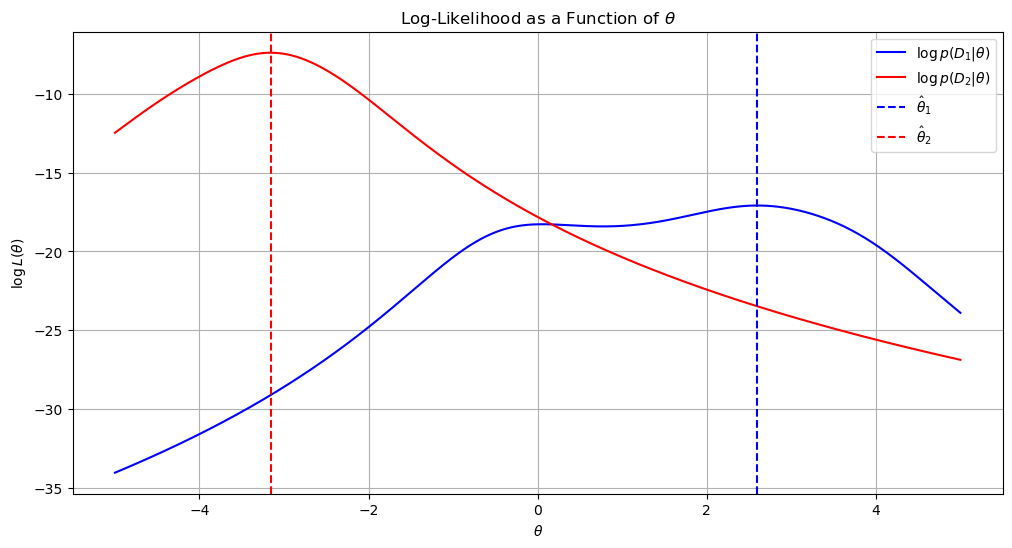

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(candidates, log_likelihood_D1, label=r'$\log p(D_1|\theta)$', color='blue')
plt.plot(candidates, log_likelihood_D2, label=r'$\log p(D_2|\theta)$', color='red')
plt.axvline(theta_hat_1, color='blue', linestyle='--', label=r'$\hat{\theta}_1$')
plt.axvline(theta_hat_2, color='red', linestyle='--', label=r'$\hat{\theta}_2$')
plt.title("Log-Likelihood as a Function of $\\theta$")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\log L(\theta)$")
plt.legend()
plt.grid()
plt.show()

## A2

We calculate the *a priori probabilities* for each cass $\omega_i$. Since we have a total of 12 samples, 7 classified in $\omega_1$ and 5 in $\omega_2$, those would be 7/12 and 5/12 respectivelly.

In [7]:
P1 = len(D1) / (len(D1)+len(D2))
P2 = len(D2) / (len(D1)+len(D2))

We then declare the discriminant function like so:
$$
g(x) = \log P(x \mid \hat{\theta}_1) - \log P(x \mid \hat{\theta}_2) + \log P(\omega_1) - \log P(\omega_2)
$$

In [8]:
def g(x, theta1, theta2, P1, P2):
    return np.log(pdf(x, theta1)) - np.log(pdf(x, theta2)) + np.log(P1) - np.log(P2)

### Plot of g(x)

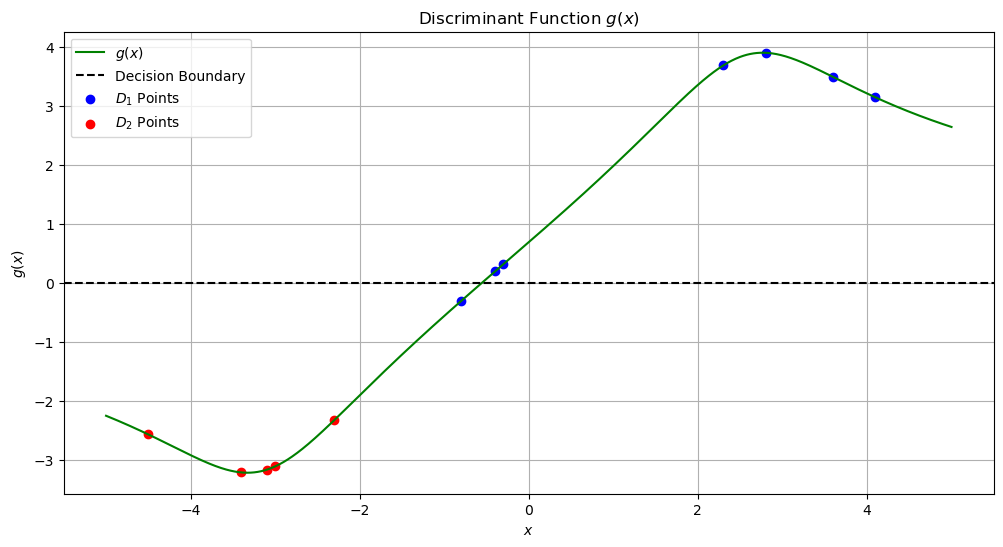

In [9]:
# range of x values for plotting g(x)
x_values = np.linspace(-5, 5, 1000)
g_values = g(x_values, theta_hat_1, theta_hat_2, P1, P2)

plt.figure(figsize=(12, 6))
plt.plot(x_values, g_values, label=r"$g(x)$", color="green")
plt.axhline(0, color="black", linestyle="--", label="Decision Boundary")
plt.scatter(D1, g(D1, theta_hat_1, theta_hat_2, P1, P2), color="blue", label=r"$D_1$ Points")
plt.scatter(D2, g(D2, theta_hat_1, theta_hat_2, P1, P2), color="red", label=r"$D_2$ Points")
plt.title("Discriminant Function $g(x)$")
plt.xlabel("$x$")
plt.ylabel("$g(x)$")
plt.legend()
plt.grid()
plt.show()

#### Observations
- Most of the $D1$ points are classified correctly, as their $g(x) > 0$.
- All of the $D2$ points are classified correctly, as their $g(x) < 0$.

#### Decision Rule
The decision boundary is at $g(x) = 0$.
For any $x$:
- If $g(x) > 0$, classify $x$ as $ω1$ (no stress).
- If $g(x) < 0$, classify $x$ as $ω2$ (stress).

#### Summary
The classification rule leads to some misclassifications. While the decision rule works well for most of the data (11/12, 92%), there are always some trade-offs in classification accuracy. Achieving perfect classification is sometimes not feasible or desirable.

- Attempting to perfectly classify all points might lead to **overfitting**. A model that fits all training data perfectly may not generalize well to unseen data.
- The data may inherently contain some ambiguous or **overlapping cases** that no model can perfectly classify, especially if the two classes are not linearly separable.